Found folder: C:\repositories\ProbabilisticComputing\Circuit_Library
Found folder: C:\repositories\ProbabilisticComputing\Circuit_Library
Found folder: C:\repositories\ProbabilisticComputing\Circuit_Library
Found folder: C:\repositories\ProbabilisticComputing\Circuit_Library
Found folder: C:\repositories\ProbabilisticComputing\Circuit_Library


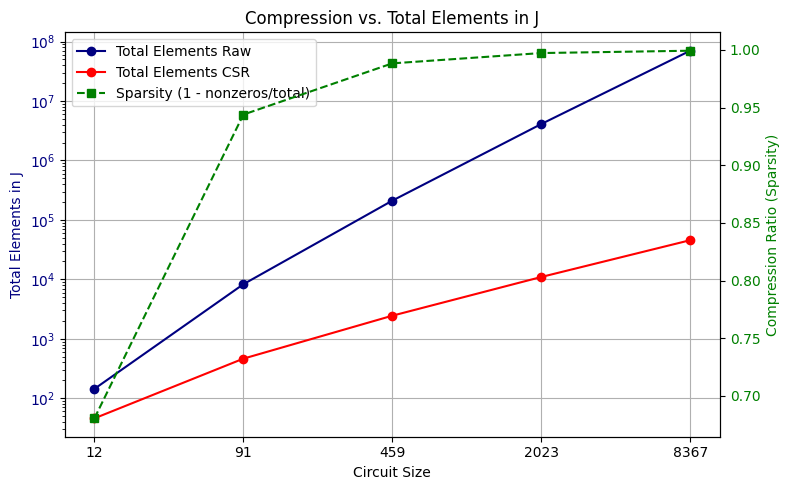

In [ ]:
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import numpy as np
from Scripts.CustomScripts import load_npz_data
import os
J_4bIntFac, h_4bIntFac, node_order_4bIntFac = load_npz_data("2x2=4bIntFac.npz")
J_8bIntFac, h_8bIntFac, node_order_8bIntFac = load_npz_data("4x4=8bIntFac.npz")
J_16bIntFac, h_16bIntFac, node_order_16bIntFac = load_npz_data("8x8=16bIntFac.npz")
J_32bIntFac, h_32bIntFac, node_order_32bIntFac = load_npz_data("16x16=32bIntFac.npz")
J_64bIntFac, h_64bIntFac, node_order_64bIntFac = load_npz_data("32x32=64bIntFac.npz")

J_4bIntFac_zero_count = np.size(J_4bIntFac) - np.count_nonzero(J_4bIntFac)
J_8bIntFac_zero_count = np.size(J_8bIntFac) - np.count_nonzero(J_8bIntFac)
J_16bIntFac_zero_count = np.size(J_16bIntFac) - np.count_nonzero(J_16bIntFac)
J_32bIntFac_zero_count = np.size(J_32bIntFac) - np.count_nonzero(J_32bIntFac)
J_64bIntFac_zero_count = np.size(J_64bIntFac) - np.count_nonzero(J_64bIntFac)

# Convert J to Compressed Sparse Row (CSR) format
J_sparse_4bIntFac = csr_matrix(J_4bIntFac)
J_sparse_8bIntFac = csr_matrix(J_8bIntFac)
J_sparse_16bIntFac = csr_matrix(J_16bIntFac)
J_sparse_32bIntFac = csr_matrix(J_32bIntFac)
J_sparse_64bIntFac = csr_matrix(J_64bIntFac)


# Extract CSR components
values_4bIntFac = J_sparse_4bIntFac.data
values_8bIntFac = J_sparse_8bIntFac.data
values_16bIntFac = J_sparse_16bIntFac.data
values_32bIntFac = J_sparse_32bIntFac.data
values_64bIntFac = J_sparse_64bIntFac.data

# col_indices_4bIntFac = J_sparse_4bIntFac.indices
# col_indices_8bIntFac = J_sparse_8bIntFac.indices
# col_indices_16bIntFac = J_sparse_16bIntFac.indices
# col_indices_32bIntFac = J_sparse_32bIntFac.indices
# col_indices_64bIntFac = J_sparse_64bIntFac.indices

# row_ptr_4bIntFac = J_sparse_4bIntFac.indptr
# row_ptr_8bIntFac = J_sparse_8bIntFac.indptr
# row_ptr_16bIntFac = J_sparse_16bIntFac.indptr
# row_ptr_32bIntFac = J_sparse_32bIntFac.indptr
# row_ptr_64bIntFac = J_sparse_64bIntFac.indptr

# Labels for the x-axis (circuit sizes)
labels = [f"{np.size(J_4bIntFac,0)}", f"{np.size(J_8bIntFac,0)}",f"{np.size(J_16bIntFac,0)}", f"{np.size(J_32bIntFac,0)}", f"{np.size(J_64bIntFac,0)}"]

# Corresponding zero counts (from your code)
total_elements_raw= [
    np.size(J_4bIntFac),
    np.size(J_8bIntFac),
    np.size(J_16bIntFac),
    np.size(J_32bIntFac),
    np.size(J_64bIntFac)
]

# Corresponding zero counts (from your code)
compression_ratio = [
    1-np.size(J_sparse_4bIntFac.data)/np.size(J_4bIntFac),
    1-np.size(J_sparse_8bIntFac.data)/np.size(J_8bIntFac),
    1-np.size(J_sparse_16bIntFac.data)/np.size(J_16bIntFac),
    1-np.size(J_sparse_32bIntFac.data)/np.size(J_32bIntFac),
    1-np.size(J_sparse_64bIntFac.data)/np.size(J_64bIntFac)
]

total_elements_CSR = [
    np.size(J_sparse_4bIntFac.data),
    np.size(J_sparse_8bIntFac.data),
    np.size(J_sparse_16bIntFac.data),
    np.size(J_sparse_32bIntFac.data),
    np.size(J_sparse_64bIntFac.data)
]

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot zero_counts on left y-axis
ax1.set_yscale('log')
ax1.plot(labels, total_elements_raw, marker='o', linestyle='-', color='navy', label="Total Elements Raw")
ax1.plot(labels, total_elements_CSR, marker='o', linestyle='-', color='red', label="Total Elements CSR")
ax1.set_xlabel("Circuit Size")
ax1.set_ylabel("Total Elements in J", color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.grid(True)

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot compression ratio on right y-axis
ax2.plot(labels, compression_ratio, marker='s', linestyle='--', color='green', label="Sparsity (1 - nonzeros/total)")
ax2.set_ylabel("Compression Ratio (Sparsity)", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

plt.title("Compression vs. Total Elements in J")
plt.tight_layout()
os.makedirs("Plots", exist_ok=True)
plt.savefig(os.path.join("Plots", "CSR_comparsion"), dpi=300)
plt.show()
plt.show()

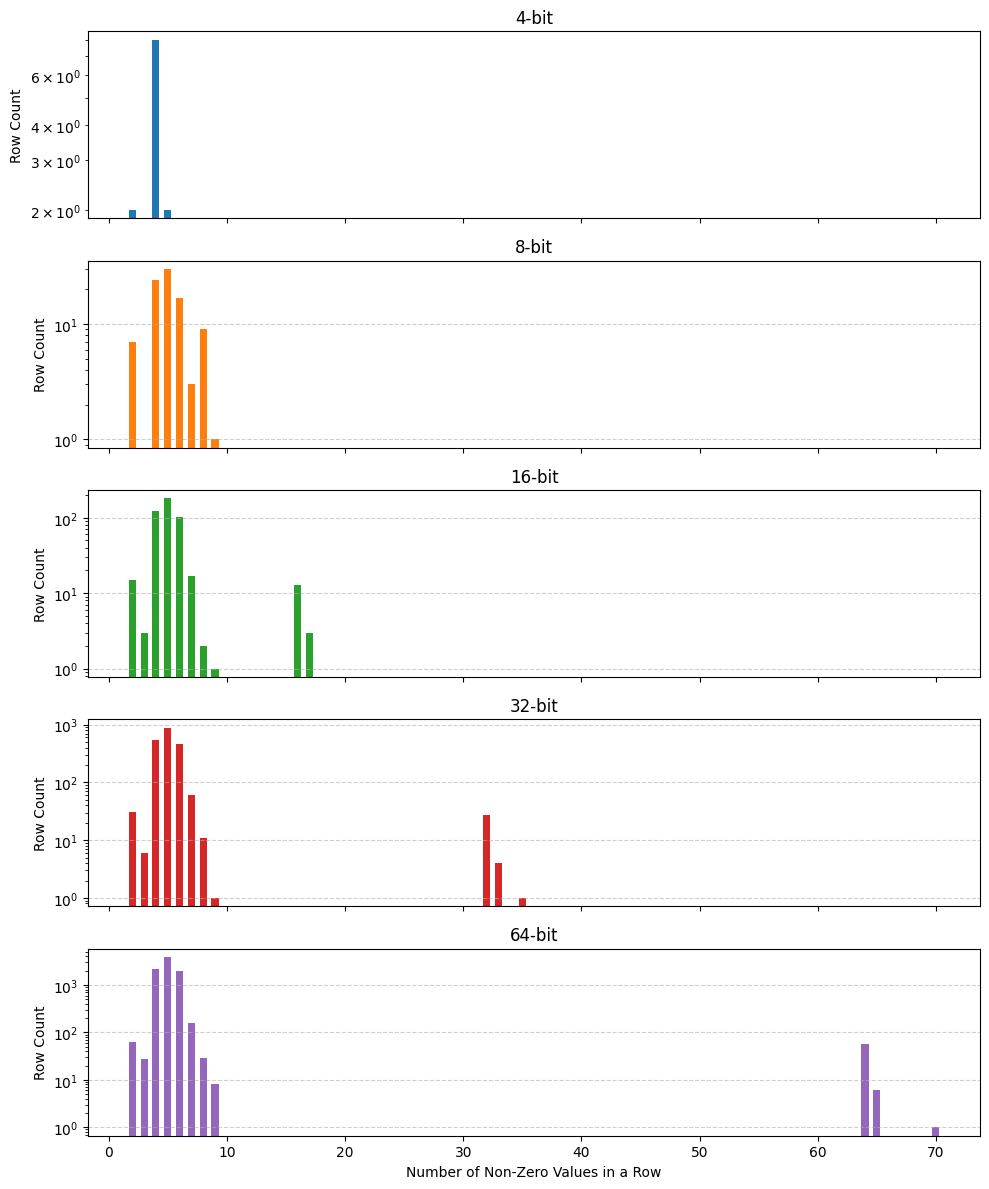

In [71]:

# Calculate number of non-zero elements per row
nonzeros_per_row_4bIntFac = J_sparse_4bIntFac.indptr[1:] - J_sparse_4bIntFac.indptr[:-1]
nonzeros_per_row_8bIntFac = J_sparse_8bIntFac.indptr[1:] - J_sparse_8bIntFac.indptr[:-1]
nonzeros_per_row_16bIntFac = J_sparse_16bIntFac.indptr[1:] - J_sparse_16bIntFac.indptr[:-1]
nonzeros_per_row_32bIntFac = J_sparse_32bIntFac.indptr[1:] - J_sparse_32bIntFac.indptr[:-1]
nonzeros_per_row_64bIntFac = J_sparse_64bIntFac.indptr[1:] - J_sparse_64bIntFac.indptr[:-1]

# Count how many rows have each possible number of non-zeros
unique_4bIntFac, counts_4bIntFac = np.unique(nonzeros_per_row_4bIntFac, return_counts=True)
unique_8bIntFac, counts_8bIntFac = np.unique(nonzeros_per_row_8bIntFac, return_counts=True)
unique_16bIntFac, counts_16bIntFac = np.unique(nonzeros_per_row_16bIntFac, return_counts=True)
unique_32bIntFac, counts_32bIntFac = np.unique(nonzeros_per_row_32bIntFac, return_counts=True)
unique_64bIntFac, counts_64bIntFac = np.unique(nonzeros_per_row_64bIntFac, return_counts=True)

# Align all unique values
all_unique_values = sorted(set(
    unique_4bIntFac.tolist() +
    unique_8bIntFac.tolist() +
    unique_16bIntFac.tolist() +
    unique_32bIntFac.tolist() +
    unique_64bIntFac.tolist()
))

x = np.array(all_unique_values)
bar_width = 0.15  # Narrower bars for side-by-side layout
offsets = [-2, -1, 0, 1, 2]  # Relative offsets for each bar group

def align_counts(unique, counts, x_ref):
    count_dict = dict(zip(unique, counts))
    return np.array([count_dict.get(val, 0) for val in x_ref])

# Align all counts to common x-axis
c4 = align_counts(unique_4bIntFac, counts_4bIntFac, x)
c8 = align_counts(unique_8bIntFac, counts_8bIntFac, x)
c16 = align_counts(unique_16bIntFac, counts_16bIntFac, x)
c32 = align_counts(unique_32bIntFac, counts_32bIntFac, x)
c64 = align_counts(unique_64bIntFac, counts_64bIntFac, x)

counts_list = [c4, c8, c16, c32, c64]
labels = ['4-bit', '8-bit', '16-bit', '32-bit', '64-bit']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 12), sharex=True)

for i, ax in enumerate(axs):
    ax.bar(x, counts_list[i], color=colors[i], width=0.6)
    ax.set_yscale('log')
    ax.set_ylabel('Row Count')
    ax.set_title(f'{labels[i]}')
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

axs[-1].set_xlabel('Number of Non-Zero Values in a Row')
os.makedirs("Plots", exist_ok=True)
plt.savefig(os.path.join("Plots", "distribution_nonZero_row_large"), dpi=300)
plt.tight_layout()
plt.show()

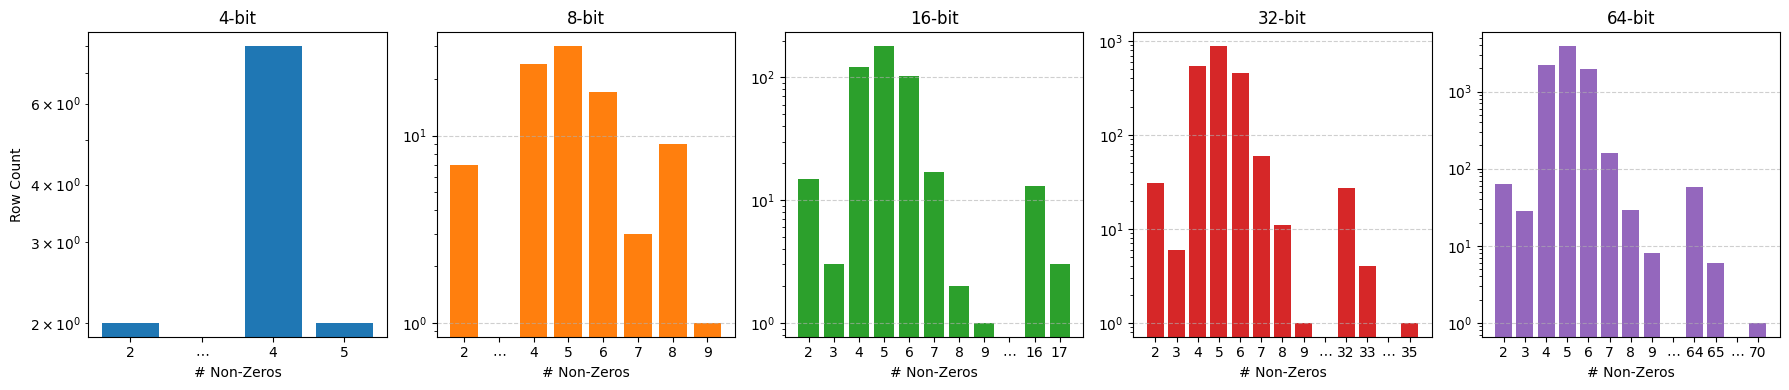

In [101]:
counts_list = [c4, c8, c16, c32, c64]
labels = ['4-bit', '8-bit', '16-bit', '32-bit', '64-bit']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Get all x values from the global `x` array
x_values = np.array(x)

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))

for i, ax in enumerate(axs):
    counts = counts_list[i]
    x_vals = x_values[counts > 0]
    y_vals = counts[counts > 0]

    x_pos = []
    y_plot = []
    x_labels = []
    ordinal = 0
    last_x = None

    for x_val, y in zip(x_vals, y_vals):
        if last_x is not None and x_val - last_x > 1:
            # Insert ellipsis
            x_labels.append(r"$\cdots$")
            x_pos.append(ordinal)
            y_plot.append(0)
            ordinal += 1

        x_labels.append(str(x_val))
        x_pos.append(ordinal)
        y_plot.append(y)
        ordinal += 1
        last_x = x_val

    ax.bar(x_pos, y_plot, color=colors[i], width=0.8)
    ax.set_title(labels[i])
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_labels)
    ax.set_yscale('log')
    ax.set_xlabel("# Non-Zeros")
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    if i == 0:
        ax.set_ylabel("Row Count")


# plt.suptitle("Distribution of Non-Zero Values per Row (Integer Factorization)", y=1.1)
plt.tight_layout()
os.makedirs("Plots", exist_ok=True)
plt.savefig(os.path.join("Plots", "distribution_nonZero_row_compact"), dpi=300)
plt.show()